In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
comp=pd.read_csv('/Users/pratikgade123/Desktop/Pandas/Company_Data.csv')

In [3]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
comp.shape

(400, 11)

In [6]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
comp['ShelveLoc'] = comp['ShelveLoc'].astype('category')
comp['Urban'] = comp['Urban'].astype('category')
comp['US'] = comp['US'].astype('category')

In [8]:
comp.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [9]:
sales_mean = comp.Sales.mean()
sales_mean

7.496325

In [10]:
comp['High'] = comp.Sales.map(lambda x: 1 if x > 8 else 0)  #mean=7.49 is round of 8
comp.High

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [11]:
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [12]:
label_encoder = preprocessing.LabelEncoder()
comp['ShelveLoc'] = label_encoder.fit_transform(comp['ShelveLoc'])

In [40]:
comp['Urban'] = label_encoder.fit_transform(comp['Urban'])
comp['US'] = label_encoder.fit_transform(comp['US'])

In [41]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [42]:
x=comp.iloc[:,1:11]
y=comp['High']

In [43]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [44]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [45]:
comp['High'].unique()

array([1, 0])

In [46]:
comp.High.value_counts()


0    236
1    164
Name: High, dtype: int64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0) #splitting data

In [48]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, class_weight = 'balanced')   #model building by C5.0

In [51]:
model.fit(x_train,y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

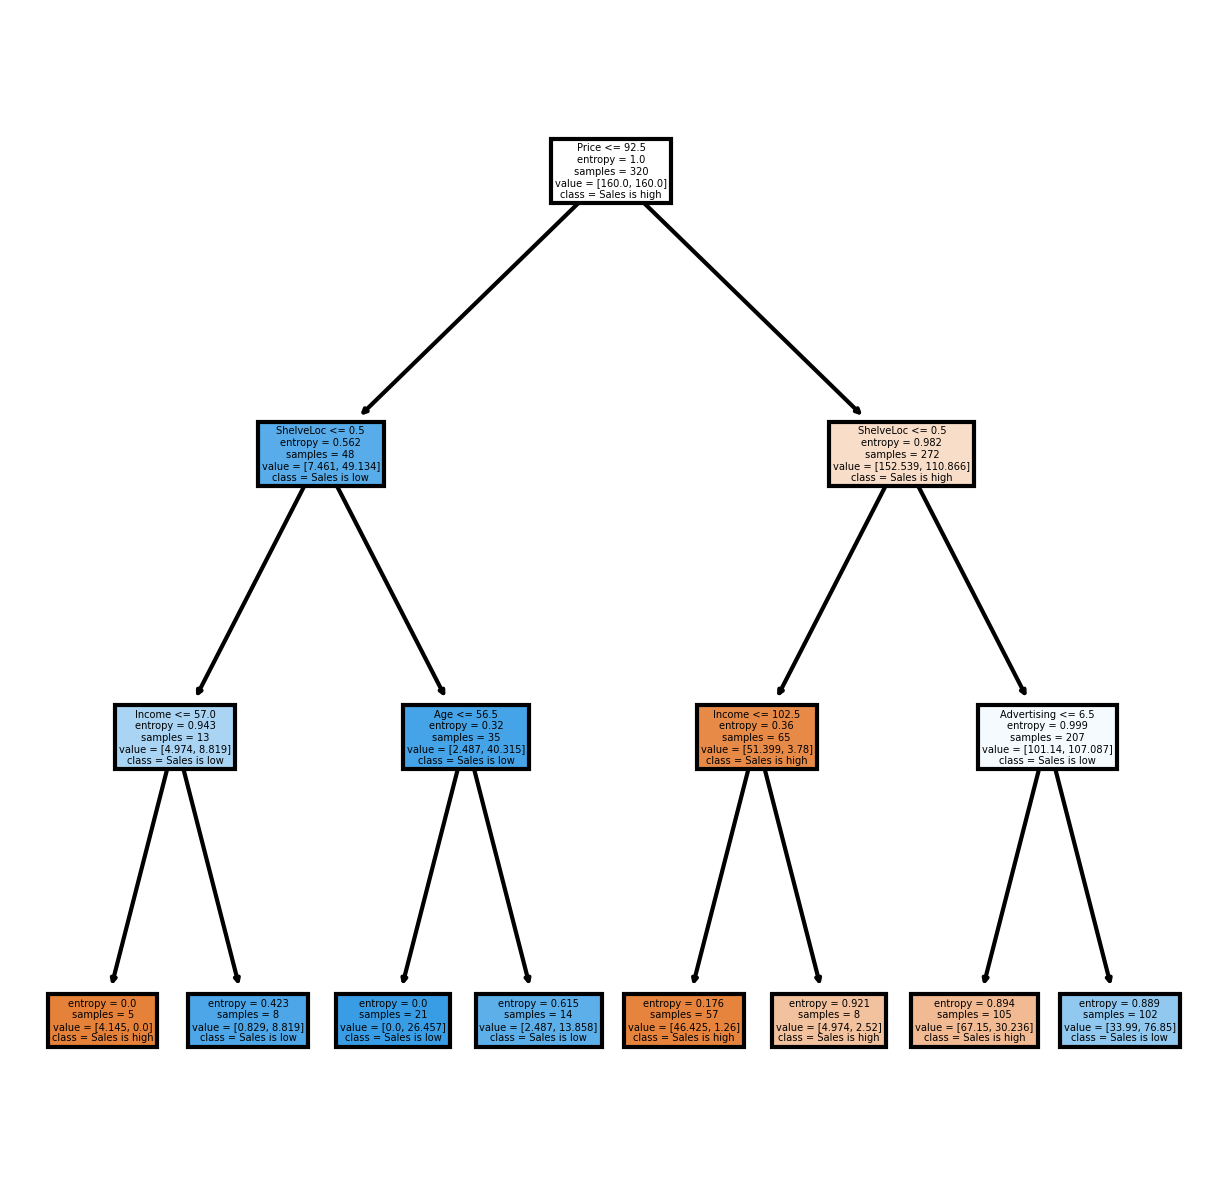

In [54]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']  #we will extract the features
cn = ['Sales is high', 'Sales is low']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(5,5), dpi = 300)   
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [55]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    45
1    35
dtype: int64

In [56]:
preds

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [57]:
crosstable = pd.crosstab(y_test,preds)
crosstable


col_0,0,1
High,,
0,33,10
1,12,25


In [58]:
np.mean(preds==y_test)


0.725

In [59]:
print(classification_report(preds,y_test))


              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.68      0.71      0.69        35

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.73      0.72      0.73        80



In [61]:
model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, class_weight = 'balanced')   #model building by CART 

In [62]:
model_1.fit(x_train,y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=3)

[Text(0.5, 0.875, 'X[4] <= 92.5\ngini = 0.5\nsamples = 320\nvalue = [160.0, 160.0]'),
 Text(0.25, 0.625, 'X[5] <= 0.5\ngini = 0.229\nsamples = 48\nvalue = [7.461, 49.134]'),
 Text(0.125, 0.375, 'X[1] <= 57.0\ngini = 0.461\nsamples = 13\nvalue = [4.974, 8.819]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [4.145, 0.0]'),
 Text(0.1875, 0.125, 'gini = 0.157\nsamples = 8\nvalue = [0.829, 8.819]'),
 Text(0.375, 0.375, 'X[3] <= 198.5\ngini = 0.109\nsamples = 35\nvalue = [2.487, 40.315]'),
 Text(0.3125, 0.125, 'gini = 0.258\nsamples = 14\nvalue = [2.487, 13.858]'),
 Text(0.4375, 0.125, 'gini = -0.0\nsamples = 21\nvalue = [0.0, 26.457]'),
 Text(0.75, 0.625, 'X[5] <= 0.5\ngini = 0.487\nsamples = 272\nvalue = [152.539, 110.866]'),
 Text(0.625, 0.375, 'X[1] <= 102.5\ngini = 0.128\nsamples = 65\nvalue = [51.399, 3.78]'),
 Text(0.5625, 0.125, 'gini = 0.051\nsamples = 57\nvalue = [46.425, 1.26]'),
 Text(0.6875, 0.125, 'gini = 0.446\nsamples = 8\nvalue = [4.974, 2.52]'),
 Text(0.875, 0.37

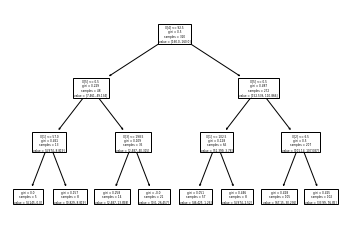

In [63]:
tree.plot_tree(model_1)


In [64]:
preds1 = model_1.predict(x_test)
preds1

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [65]:
pd.Series(preds1).value_counts()


0    45
1    35
dtype: int64

In [66]:
np.mean(preds1 == y_test)


0.725

In [67]:
# # BY Bogging and Boosting
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
#from IPython.display import Image
#from pydot import graph_from_dot_data
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

In [69]:
cmodel = dcmodel.fit(x_train,y_train) #train decision tree
y_predict = dcmodel.predict(x_test)

In [70]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )


Accuracy :  72.5


In [71]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[34  9]
 [13 24]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.76        43
           1       0.73      0.65      0.69        37

    accuracy                           0.73        80
   macro avg       0.73      0.72      0.72        80
weighted avg       0.73      0.72      0.72        80

